<a href="https://colab.research.google.com/github/dli10/college-rankings-forbes-2019/blob/main/PredictRankings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Linear Regression

* Forbes 2019 College Rankings Data Set



In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_theme(style="whitegrid")

# special matplotlib argument for improved plots
from matplotlib import rcParams

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import sys
#cwd = os.getcwd()
#print(cwd)

In [5]:
with open('ForbesAmericasTopColleges2019.csv', newline='') as data:
    forbesraw = pd.read_csv(data)

In [6]:
forbesraw.keys()

Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object')

In [7]:
forbesraw.shape

(650, 17)

In [33]:
# Print column names
print(forbesraw.columns)

# Replace spaces in names with underscores
forbesraw.columns = forbesraw.columns.str.replace(' ', '_')
print(forbesraw.columns)

Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate_Population', 'Student_Population', 'Net_Price',
       'Average_Grant_Aid', 'Total_Annual_Cost', 'Alumni_Salary',
       'Acceptance_Rate', 'SAT_Lower', 'SAT_Upper', 'ACT_Lower', 'ACT_Upper',
       'Website'],
      dtype='object')
Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate_Population', 'Student_Population', 'Net_Price',
       'Average_Grant_Aid', 'Total_Annual_Cost', 'Alumni_Salary',
       'Acceptance_Rate', 'SAT_Lower', 'SAT_Upper', 'ACT_Lower', 'ACT_Upper',
       'Website'],
      dtype='object')


In [34]:
forbesraw.head()

,Rank,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [35]:
forbesraw.describe()

,Rank,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
count,650.00000,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000
mean,325.50000,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230
std,187.78312,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,163.25000,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000
50%,325.50000,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,487.75000,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000


### Scatter plots
***

Let's look at some scatter plots for three variables: 'Undergraduate Population', 'Total Annual Cost' and 'Acceptance Rate'. 

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? 

Text(0.5, 1.0, 'Relationship between Undergraduate Population and Rank')

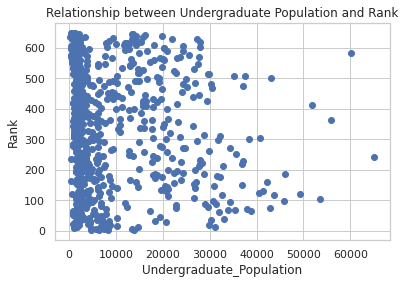

In [37]:
plt.scatter(forbesraw['Undergraduate_Population'], forbesraw['Rank'])
plt.xlabel("Undergraduate_Population")
plt.ylabel("Rank")
plt.title("Relationship between Undergraduate Population and Rank")

Text(0.5, 1.0, 'Relationship between Total Annual Cost and Rank')

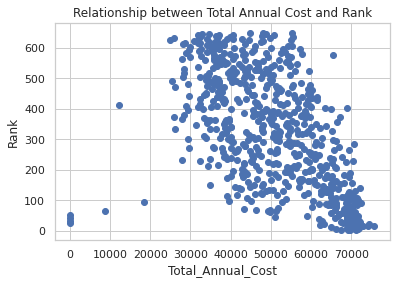

In [38]:
plt.scatter(forbesraw['Total_Annual_Cost'], forbesraw['Rank'])
plt.xlabel("Total_Annual_Cost")
plt.ylabel("Rank")
plt.title("Relationship between Total Annual Cost and Rank")

#sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

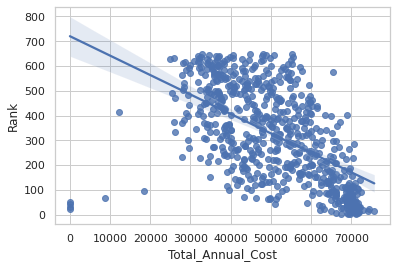

In [39]:
# We can also use seaborn regplot for this
# This provides automatic linear regression fits (useful for data exploration later on)
sns.regplot(y="Rank", x="Total_Annual_Cost", data=forbesraw, fit_reg = True)

Text(0.5, 1.0, 'Relationship between Acceptance Rate and Price')

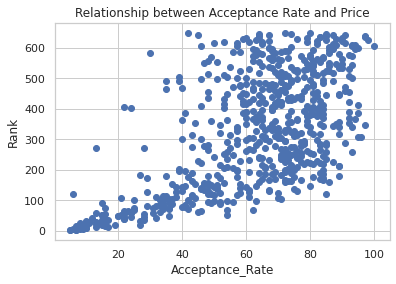

In [40]:
plt.scatter(forbesraw['Acceptance_Rate'], forbesraw['Rank'])
plt.xlabel("Acceptance_Rate")
plt.ylabel("Rank")
plt.title("Relationship between Acceptance Rate and Price")

### Histograms
***


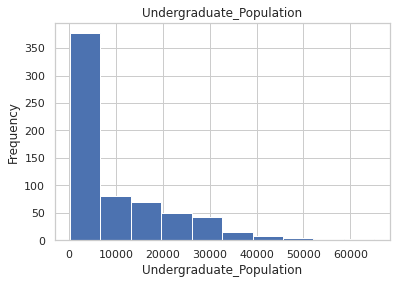

In [41]:
plt.hist(forbesraw['Undergraduate_Population'])
plt.title("Undergraduate_Population")
plt.xlabel("Undergraduate_Population")
plt.ylabel("Frequency")
plt.show()

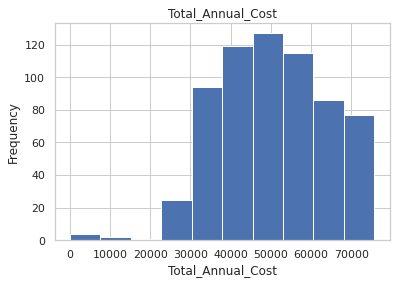

In [42]:
plt.hist(forbesraw['Total_Annual_Cost'])
plt.title('Total_Annual_Cost')
plt.xlabel('Total_Annual_Cost')
plt.ylabel('Frequency')
plt.show()

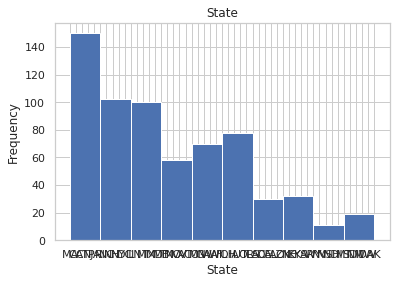

In [43]:
plt.hist(forbesraw['State'])
plt.title('State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

## Linear regression with Forbes 2019 college rankings
***

Here, 

$Y$ = college rankings

and

$X$ = all the other features (or independent variables)

which we will use to fit a linear regression model and predict college rankings. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***

In [44]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [59]:
forbesraw_no_NaN = forbesraw.dropna()
forbesraw_no_NaN.describe()

,Rank,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,318.500956,10874.346080,13173.776291,22169.518164,19668.535373,50364.416826,99046.271511,61.623327,1111.728489,1310.128107,23.372849,28.510516
std,188.889387,11620.485424,13697.553695,7779.185471,11247.855910,12628.590736,14597.397831,22.078352,128.771497,114.031172,3.763684,3.062782
min,1.000000,323.000000,406.000000,1298.000000,3597.000000,8646.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,154.000000,2151.500000,2500.000000,16258.000000,9034.000000,40009.500000,88600.000000,49.000000,1024.000000,1230.000000,21.000000,26.000000
50%,317.000000,5768.000000,7709.000000,21374.000000,18824.000000,49698.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,479.500000,17514.500000,20802.000000,27336.000000,26740.000000,60136.500000,106550.000000,78.000000,1180.000000,1380.000000,25.500000,31.000000
max,650.000000,65100.000000,75044.000000,46277.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000


In [51]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('Rank ~ Acceptance_Rate',forbesraw_no_NaN).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     359.3
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.50e-61
Time:                        23:43:40   Log-Likelihood:                -3345.6
No. Observations:                 523   AIC:                             6695.
Df Residuals:                     521   BIC:                             6704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -18.3185     18.873     

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `Acceptance_Rate` coefficient (5.3484) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. We can interpret the coefficient as, if we compare two colleges, one where the acceptance rate is say $5$ and the other college is the same except that the acceptance rate is $6$. For these two colleges the average difference in acceptance rate is about $5.3484$. The confidence interval gives us a range of plausible values for this difference, about ($4.837, 5.860$).

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), bbut you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex, for a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

Text(0.5, 1.0, 'Ranks vs Predicted Ranks: $Y_i$ vs $\\hat{Y}_i$')

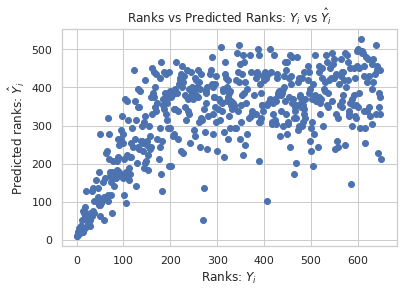

In [52]:
plt.scatter(forbesraw_no_NaN['Rank'], m.fittedvalues)
plt.xlabel("Ranks: $Y_i$")
plt.ylabel("Predicted ranks: $\hat{Y}_i$")
plt.title("Ranks vs Predicted Ranks: $Y_i$ vs $\hat{Y}_i$")

### Fitting Linear Regression using `sklearn`


In [53]:
from sklearn.linear_model import LinearRegression
X = forbesraw_no_NaN.drop('Rank', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 

In [54]:
# Look inside linear regression object
# LinearRegression.<tab>
#lm.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [55]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [61]:
forbesraw.head()

,Rank,Name,City,State,Public/Private,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [62]:
forbes_num = forbesraw
deletenames = ["Name", "City", "State", "Public/Private", "Website"] # create list of variables not of interest, columns to delete

for name in deletenames:
  forbes_num = forbes_num.drop(name,1)

forbes_num.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Rank,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
0,1.0,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0
1,2.0,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0
2,3.0,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0
3,4.0,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0
4,5.0,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0


In [63]:
forbes_num.describe()

,Rank,Undergraduate_Population,Student_Population,Net_Price,Average_Grant_Aid,Total_Annual_Cost,Alumni_Salary,Acceptance_Rate,SAT_Lower,SAT_Upper,ACT_Lower,ACT_Upper
count,650.00000,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000
mean,325.50000,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230
std,187.78312,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,163.25000,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000
50%,325.50000,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,487.75000,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000


In [65]:
# Use all 13 predictors to fit linear regression model
forbes_num = forbes_num.dropna()
X = forbes_num.drop('Rank', axis = 1)

lm.fit(X, forbes_num['Rank'])

# your turn
# notice fit_intercept=True and normalize=True
# How would you change the model to not fit an intercept term? 

LinearRegression()

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [66]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 1766.0813581511093


In [67]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 11


In [68]:
zip(X.columns, lm.coef_)

In [69]:
# The coefficients
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Undergraduate_Population,-0.003801
1,Student_Population,0.002003
2,Net_Price,-0.000689
3,Average_Grant_Aid,0.003961
4,Total_Annual_Cost,-0.004384
5,Alumni_Salary,-0.002624
6,Acceptance_Rate,0.285396
7,SAT_Lower,-0.194033
8,SAT_Upper,-0.139200
9,ACT_Lower,-12.400268


### Predict Prices 

We can calculate the predicted ranks ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [71]:
# first five predicted ranks
lm.predict(X)[0:5]

array([ -49.47465295,  -27.32031178,  -39.86798504, -112.06308933,
        -11.89007147])

Text(0, 0.5, 'Frequency')

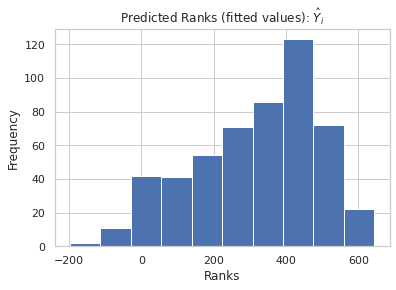

In [72]:
plt.hist(lm.predict(X))
plt.title('Predicted Ranks (fitted values): $\hat{Y}_i$')
plt.xlabel('Ranks')
plt.ylabel('Frequency')

Let's plot the true prices compared to the predicted prices to see they disagree, we saw this exactly before but this is how you access the predicted values in using `sklearn`.

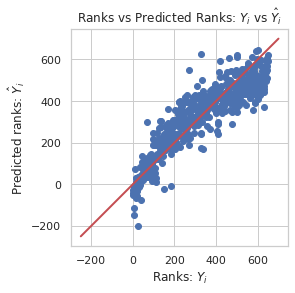

In [83]:
plt.scatter(forbes_num['Rank'], lm.predict(X))
plt.xlabel("Ranks: $Y_i$")
plt.ylabel("Predicted ranks: $\hat{Y}_i$")
plt.title("Ranks vs Predicted Ranks: $Y_i$ vs $\hat{Y}_i$")
plt.plot([-250, 700], [-250, 700], color='r', linestyle='-', linewidth=2)
plt.gca().set_aspect('equal')

### Residual sum of squares

Let's calculate the residual sum of squares 

$$ S = \sum_{i=1}^N r_i = \sum_{i=1}^N (y_i - (\beta_0 + \beta_1 x_i))^2 $$

In [84]:
print(np.sum((forbes_num['Rank'] - lm.predict(X)) ** 2))

3588492.5999069065


#### Mean squared error

In [85]:
mseFull = np.mean((forbes_num['Rank'] - lm.predict(X)) ** 2)
print(mseFull)

6848.268320433029


## Relationship between `Total Annual Cost` and rank
***

Try fitting a linear regression model using only the 'Total Annual Cost'

Calculate the mean squared error. 


In [86]:
lm = LinearRegression()
lm.fit(X[['Total_Annual_Cost']], forbes_num['Rank'])

LinearRegression()

In [87]:
mseTAC = np.mean((forbes_num['Rank'] - lm.predict(X[['Total_Annual_Cost']])) ** 2)
print(mseTAC)

20711.327487755345


We can also plot the fitted linear regression line. 

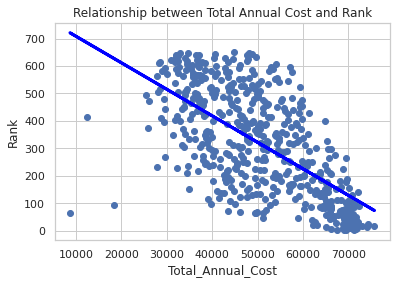

In [88]:
plt.scatter(forbes_num['Total_Annual_Cost'], forbes_num['Rank'])
plt.xlabel("Total_Annual_Cost")
plt.ylabel("Rank")
plt.title("Relationship between Total Annual Cost and Rank")

plt.plot(forbes_num['Total_Annual_Cost'], lm.predict(X[['Total_Annual_Cost']]), color='blue', linewidth=3)
plt.show()

# Part 3: Training and Test Data sets

### Purpose of splitting data into Training/testing sets
***
<div class="span5 alert alert-info">

<p> Let's stick to the linear regression example: </p>
<ul>
  <li> We built our model with the requirement that the model fit the data well. </li>
  <li> As a side-effect, the model will fit <b>THIS</b> dataset well. What about new data? </li>
    <ul>
      <li> We wanted the model for predictions, right?</li>
    </ul>
  <li> One simple solution, leave out some data (for <b>testing</b>) and <b>train</b> the model on the rest </li>
  <li> This also leads directly to the idea of cross-validation, next section. </li>  
</ul>
</div>

***

One way of doing this is you can create training and testing data sets manually. 

In [89]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = forbes_num['Rank'][:-50]
Y_test = forbes_num['Rank'][-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(474, 11)
(50, 11)
(474,)
(50,)


Another way, is to split the data into random train and test subsets using the function `train_test_split` in `sklearn.cross_validation`. 

In [90]:
# let's look at the function in the help file
sklearn.model_selection.train_test_split?

In [91]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, forbes_num['Rank'], test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(351, 11)
(173, 11)
(351,)
(173,)


Your turn.  Let's build a linear regression model using our new training data sets. 

In [92]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Now, calculate the mean squared error using just the test data and compare to mean squared from using all the data to fit the model. 

In [93]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 6613.488987879483
Fit a model X_train, and calculate MSE with X_test, Y_test: 7600.909294395823


#### Residual plots

Text(0, 0.5, 'Residuals')

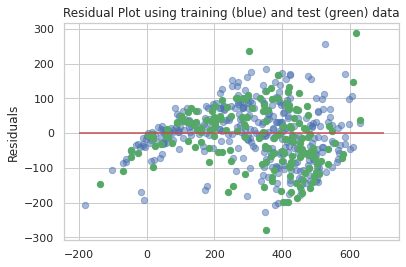

In [97]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=-200, xmax = 700, colors = 'r')
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

# Logistic Regression Model

In [111]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
lm.fit(X, forbes_num['Rank'])
pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [109]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 6613.488987879483
Fit a model X_train, and calculate MSE with X_test, Y_test: 7600.909294395823


Text(0, 0.5, 'Residuals')

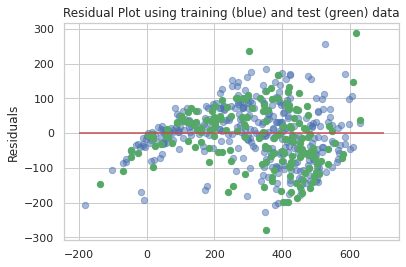

In [110]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=-200, xmax = 700, colors='r')
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')